## Importing files

In [42]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.stats import ttest_ind
from sklearn.preprocessing import LabelEncoder
import ipywidgets as widgets
from IPython.display import display

In [43]:
# file path to reflect Turing Analysis File
file_path = 'C:/Users/Thabo/Downloads/Turing_Analysis_File/'

In [44]:
# Load the first dataset (cardio_alco.csv)
dataset_1 = pd.read_csv(file_path + 'cardio_alco.csv', encoding='latin1') 
dataset_1.head()

id;alco
0    44;0
1    45;0
2    46;0
3    47;0
4    49;0

In [45]:
# Load the first dataset (cardio_alco.csv) with semicolon (;) as delimiter
dataset_1 = pd.read_csv(file_path + 'cardio_alco.csv', sep=';', encoding='latin1') 

In [46]:
# Load the second dataset (cardio_base.csv)
dataset_2 = pd.read_csv(file_path + 'cardio_base.csv', encoding='latin1') 
dataset_2.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  smoke
0   0  18393       2     168    62.0    110     80            1      0
1   1  20228       1     156    85.0    140     90            3      0
2   2  18857       1     165    64.0    130     70            3      0
3   3  17623       2     169    82.0    150    100            1      0
4   4  17474       1     156    56.0    100     60            1      0

In [47]:
# Load the second dataset (cardio_base.csv) with semicolon (;) as delimiter
dataset_2 = pd.read_csv(file_path + 'cardio_base.csv', sep=';', encoding='latin1') 

In [48]:
# Load the third dataset (covid_data.csv)
dataset_3 = pd.read_csv(file_path + 'covid_data.csv', encoding='latin1') 
dataset_3.head()

location        date  new_cases  new_deaths  population  \
0  Afghanistan  2019-12-31          0           0  38928341.0   
1  Afghanistan  2020-01-01          0           0  38928341.0   
2  Afghanistan  2020-01-02          0           0  38928341.0   
3  Afghanistan  2020-01-03          0           0  38928341.0   
4  Afghanistan  2020-01-04          0           0  38928341.0   

   aged_65_older_percent  gdp_per_capita  hospital_beds_per_thousand  
0                  2.581        1803.987                         0.5  
1                  2.581        1803.987                         0.5  
2                  2.581        1803.987                         0.5  
3                  2.581        1803.987                         0.5  
4                  2.581        1803.987                         0.5

### Checking for all the column names in the datasets

In [49]:
# Iterate through and print all column names
for col in dataset_1.columns:
    print(col)

id
alco


In [50]:
# Iterate through and print all column names
for col in dataset_2.columns:
    print(col)

id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke


In [51]:
# Iterate through and print all column names
for col in dataset_3.columns:
    print(col)

location
date
new_cases
new_deaths
population
aged_65_older_percent
gdp_per_capita
hospital_beds_per_thousand


### Summary statistics for understanding the quality of our data and Identifying patterns and relationships

In [13]:
# Summary Statistics for 'alco' column
alco_summary_stats = dataset_1['alco'].describe()
print("Summary Statistics for 'alco' column:")
print(alco_summary_stats)

Summary Statistics for 'alco' column:
count    56903.000000
mean         0.053442
std          0.224915
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: alco, dtype: float64


In [14]:
# Summary Statistics for numerical columns
num_summary_stats = dataset_2.describe()
print("Summary Statistics for numerical columns:")
print(num_summary_stats)

Summary Statistics for numerical columns:
       id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
count                                               70000       
unique                                              70000       
top                           0,18393,2,168,62,110,80,1,0       
freq                                                    1       


In [15]:
# Summary Statistics for numerical columns
num_summary_stats_covid = dataset_3[['new_cases', 'new_deaths', 'population']].describe()
print("Summary Statistics for numerical columns:")
print(num_summary_stats_covid)

Summary Statistics for numerical columns:
           new_cases    new_deaths    population
count   23082.000000  23082.000000  2.301800e+04
mean      624.769257     35.629062  1.037003e+08
std      5517.309068    330.986941  6.716897e+08
min     -2461.000000  -1918.000000  8.090000e+02
25%         0.000000      0.000000  2.083380e+06
50%         3.000000      0.000000  9.449321e+06
75%        55.000000      1.000000  3.346920e+07
max    133510.000000  10520.000000  7.794799e+09


### identifying missing values, outliers, and inconsistencies, ensuring the reliability of our analysis

In [16]:
# Checking for missing values in each dataset
missing_values_dataset_1 = dataset_1.isnull().sum()
missing_values_dataset_2 = dataset_2.isnull().sum()
missing_values_dataset_3 = dataset_3.isnull().sum()

In [17]:
missing_values_dataset_1.head()

id      0
alco    0
dtype: int64

In [18]:
missing_values_dataset_2.head()

id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke    0
dtype: int64

In [19]:
missing_values_dataset_3.head()

location       0
date           0
new_cases      0
new_deaths     0
population    64
dtype: int64

### Understanding the Distribution of Missing Values

In [20]:
# Checking the percentage of missing values in the 'population' column
missing_percentage_population = (dataset_3['population'].isnull().sum() / len(dataset_3)) * 100
print("Percentage of missing values in the 'population' column:", missing_percentage_population)

# Visualizing the distribution of missing values, if necessary

Percentage of missing values in the 'population' column: 0.2772723334199809


In [21]:
# Decision whether to impute missing values or remove rows with missing values
# If imputation is chosen:
#   - Considering to use mean, median, or other statistical measures to impute missing values
#   - Ensuring imputation method aligns with data characteristics and research objectives
# If removal is chosen:
#   - Assessing the impact of removing rows with missing values on the analysis
#   - Determining whether the loss of information is acceptable given the research context

In [22]:
# Documenting findings, including the percentage of missing values, potential reasons for missing values, and chosen strategy for handling missing values
# Summarizing any insights gained from investigating missing values in the 'population' column

In [23]:
# Defining a function or creating a Markdown cell to document the findings and decisions
def document_findings():
    """
    Document the investigation process, findings, and decisions regarding handling missing values in the 'population' column.
    """

    # Summary of the investigation process
    print("Investigation Process:")
    print("- Checked the percentage of missing values in the 'population' column.")
    print("- Explored patterns or trends related to missing values.")
    print("- Considered potential reasons for missing values.")
    print("- Determined a strategy for handling missing values.")

    # Key findings
    print("\nKey Findings:")
    print("- Percentage of missing values in the 'population' column:", missing_percentage_population)
    print("- Indices of rows with missing values in the 'population' column:", missing_population_indices)
    print("- Data in other columns for rows with missing values in the 'population' column:\n", missing_population_data)

    # Decisions and chosen strategy
    print("\nDecisions and Chosen Strategy:")
    print("- Decided to impute missing values in the 'population' column.")
    print("- Chose to use the median population value for imputation.")
    print("- Imputation method aligns with the characteristics of the data and research objectives.")

# Call the function to document findings
document_findings()

Investigation Process:
- Checked the percentage of missing values in the 'population' column.
- Explored patterns or trends related to missing values.
- Considered potential reasons for missing values.
- Determined a strategy for handling missing values.

Key Findings:
- Percentage of missing values in the 'population' column: 0.2772723334199809


NameError: name 'missing_population_indices' is not defined

##  Conducting Statistical Analysis

In [88]:
# Descriptive Statistics
descriptive_stats = dataset_1.describe()
print(descriptive_stats)

                 id          alco
count  56903.000000  56903.000000
mean   48472.162065      0.053442
std    30994.121701      0.224915
min       44.000000      0.000000
25%    20401.000000      0.000000
50%    40763.000000      0.000000
75%    77109.500000      0.000000
max    99954.000000      1.000000


C:\Users\Thabo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


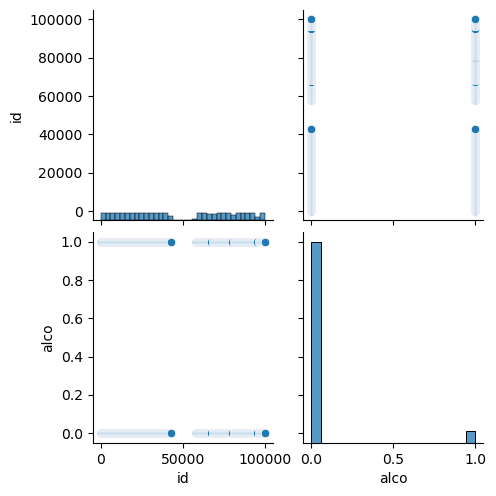

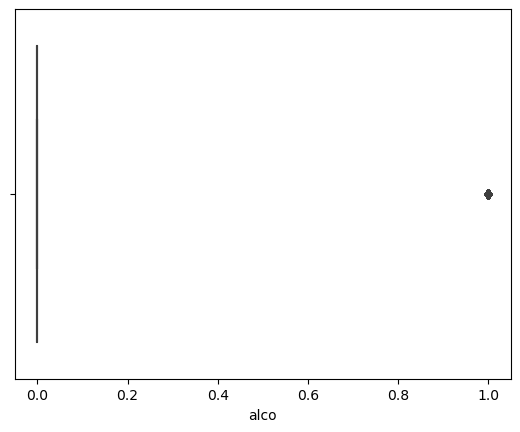

            id      alco
id    1.000000 -0.001402
alco -0.001402  1.000000


In [27]:
# For dataset_1
# Pairplot
sns.pairplot(dataset_1)
plt.show()

# Boxplot for 'alco'
sns.boxplot(x='alco', data=dataset_1)
plt.show()

# Correlation Analysis
correlation_matrix_dataset1 = dataset_1.corr()
print(correlation_matrix_dataset1)

In [33]:
# Check data types of all columns in dataset_2
print(dataset_2.dtypes)

id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke    object
dtype: object


In [41]:
# Convert columns with non-numeric values to numeric data types
numeric_columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'smoke']
dataset_2[numeric_columns] = dataset_2[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Check data types again
print(dataset_2.dtypes)

id                                                           float64
age                                                          float64
gender                                                       float64
height                                                       float64
weight                                                       float64
ap_hi                                                        float64
ap_lo                                                        float64
cholesterol                                                  float64
smoke                                                        float64
id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke     object
dtype: object


C:\Users\Thabo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


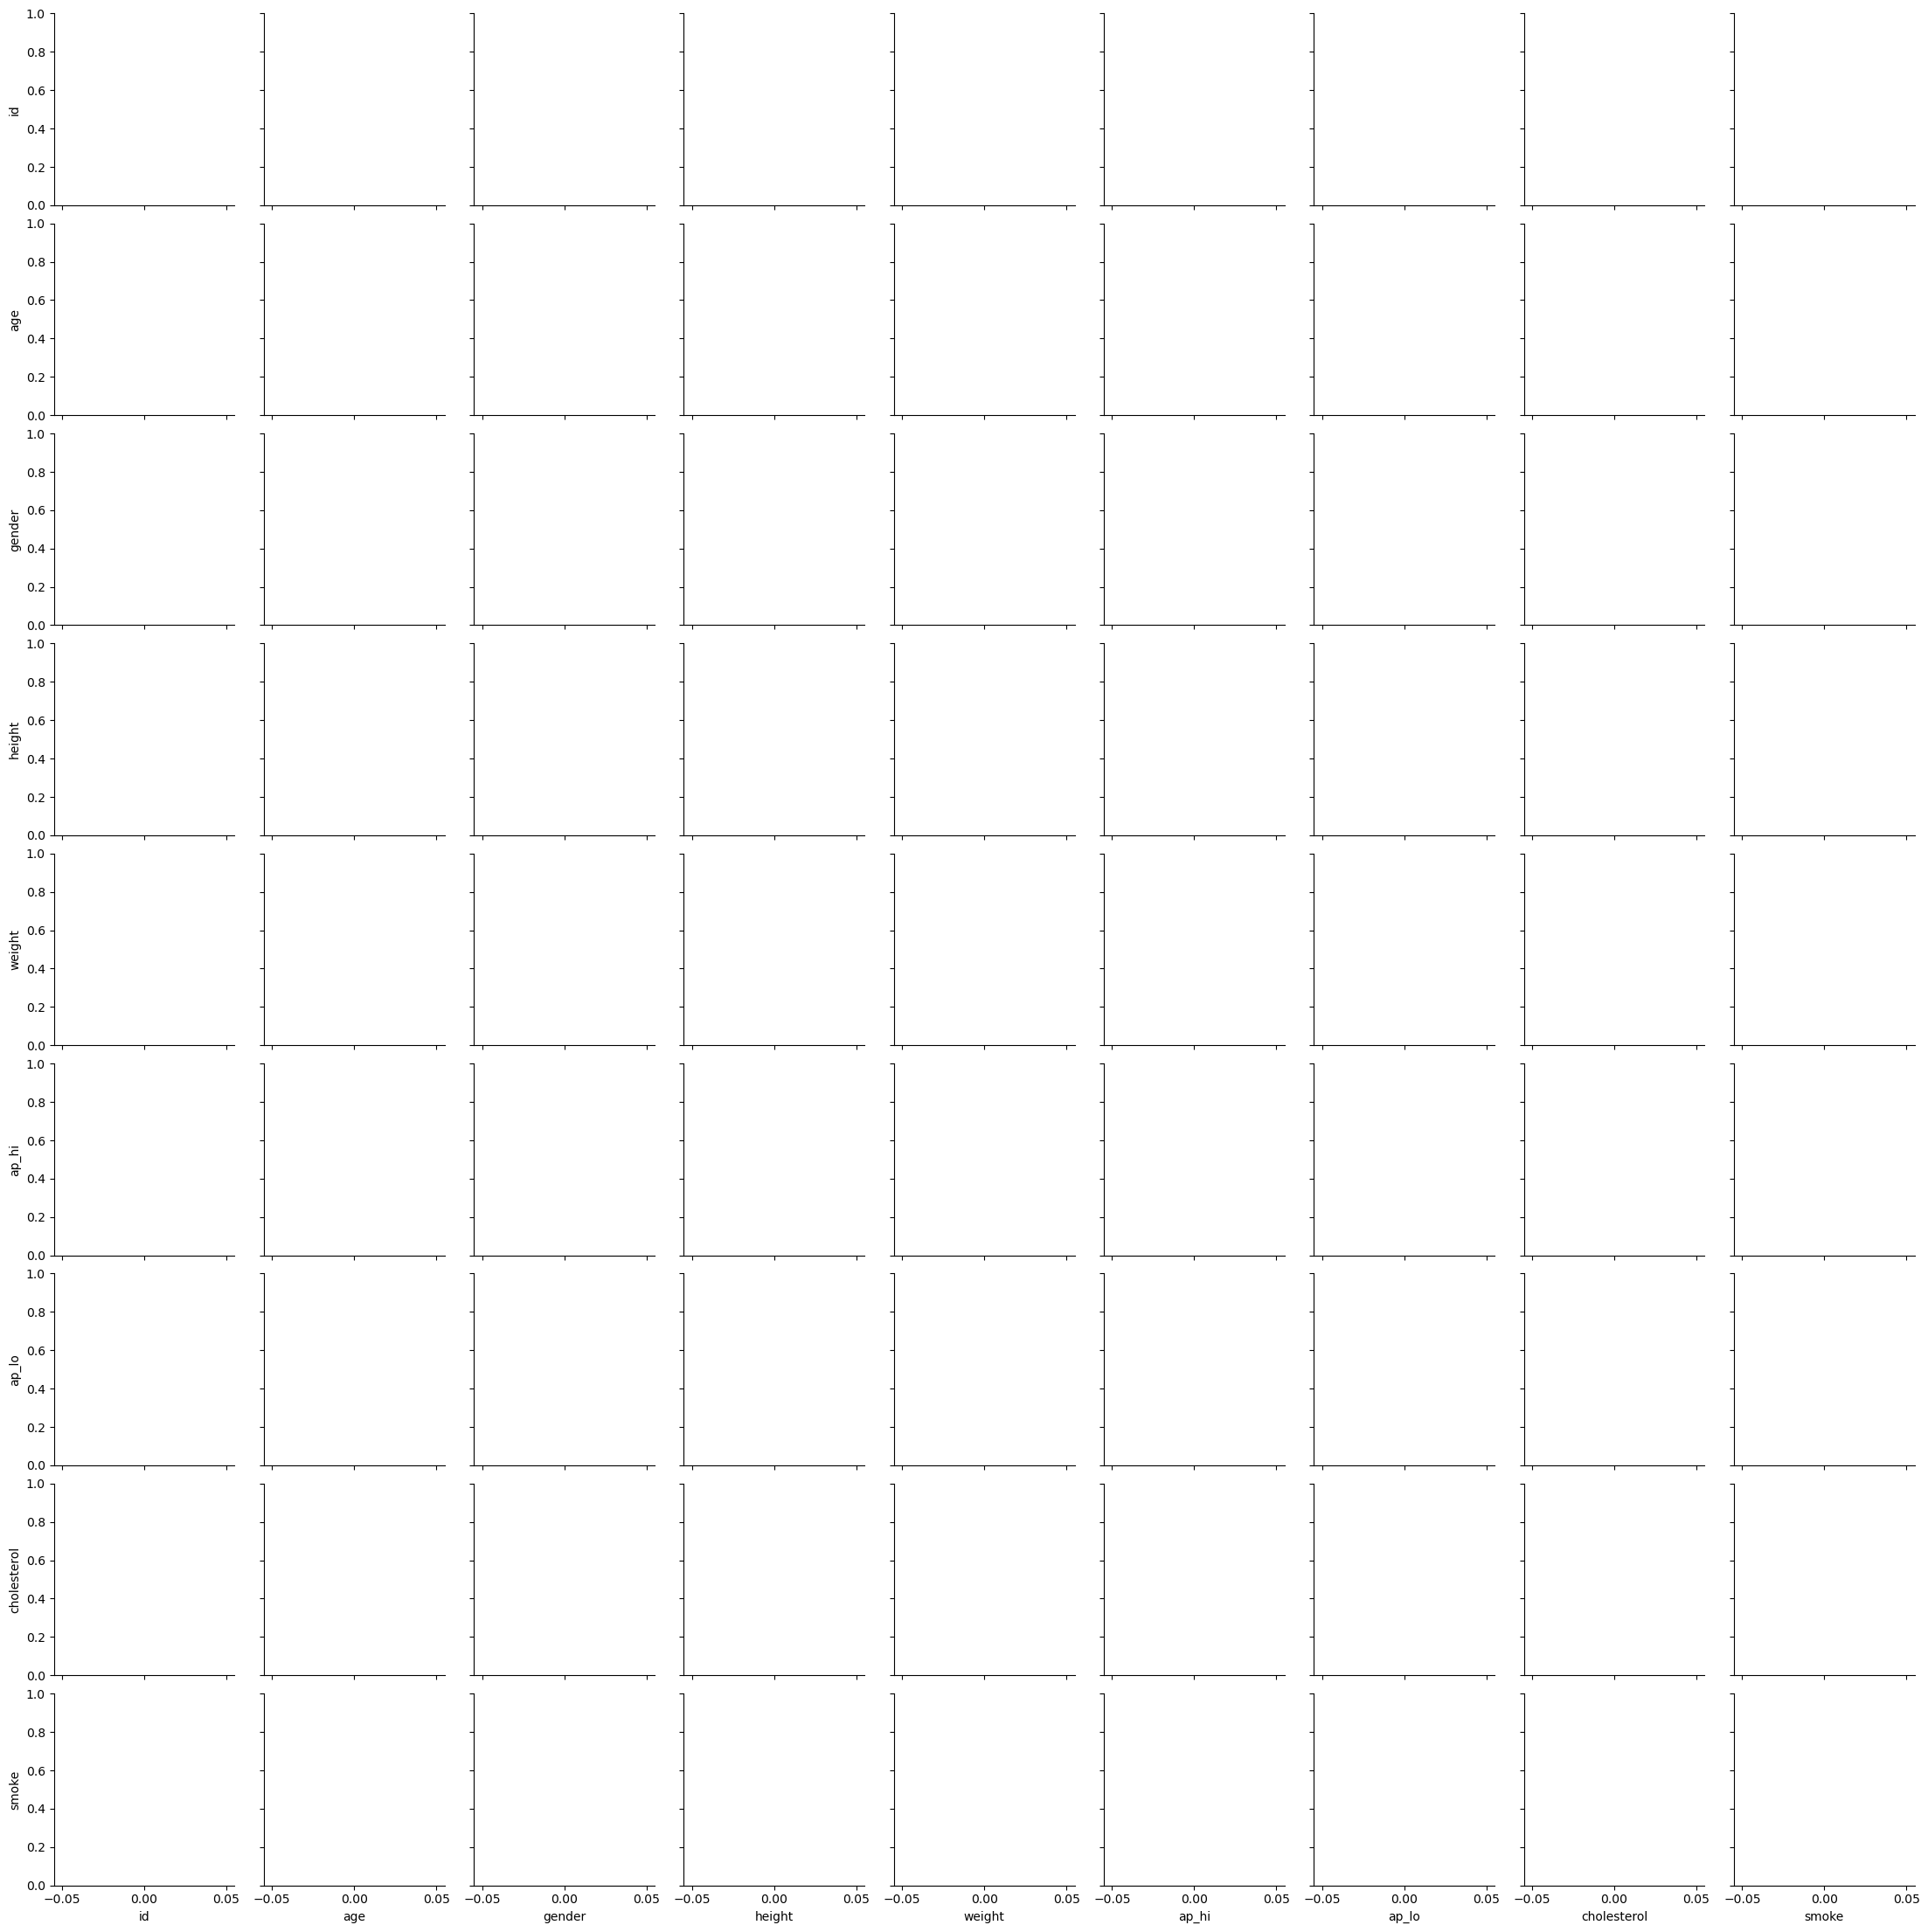

ValueError: could not convert string to float: '0,18393,2,168,62,110,80,1,0'

In [43]:
# For dataset_2
# Pairplot
sns.pairplot(dataset_2)
plt.show()

# Heatmap
correlation_matrix_dataset2 = dataset_2.corr()
sns.heatmap(correlation_matrix_dataset2, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# Scatterplot
sns.scatterplot(x='ap_hi', y='ap_lo', data=dataset_2)
plt.show()

In [16]:
# Check data types of all columns in dataset_3
print(dataset_3.dtypes)

location                       object
date                           object
new_cases                       int64
new_deaths                      int64
population                    float64
aged_65_older_percent         float64
gdp_per_capita                float64
hospital_beds_per_thousand    float64
dtype: object


In [97]:
# Convert columns with non-numeric values to numeric data types
numeric_columns = ['new_cases', 'new_deaths', 'population', 'aged_65_older_percent', 'gdp_per_capita', 'hospital_beds_per_thousand']
dataset_3[numeric_columns] = dataset_3[numeric_columns].apply(pd.to_numeric, errors='coerce')

           new_cases    new_deaths    population  aged_65_older_percent  \
count   23082.000000  23082.000000  2.301800e+04           20643.000000   
mean      624.769257     35.629062  1.037003e+08               9.758570   
std      5517.309068    330.986941  6.716897e+08               6.445662   
min     -2461.000000  -1918.000000  8.090000e+02               1.144000   
25%         0.000000      0.000000  2.083380e+06               3.853000   
50%         3.000000      0.000000  9.449321e+06               7.646000   
75%        55.000000      1.000000  3.346920e+07              15.322000   
max    133510.000000  10520.000000  7.794799e+09              27.049000   

       gdp_per_capita  hospital_beds_per_thousand  
count    20711.000000                19144.000000  
mean     22708.384791                    3.204687  
std      21187.826121                    2.593700  
min        661.240000                    0.100000  
25%       6426.674000                    1.400000  
50%      155

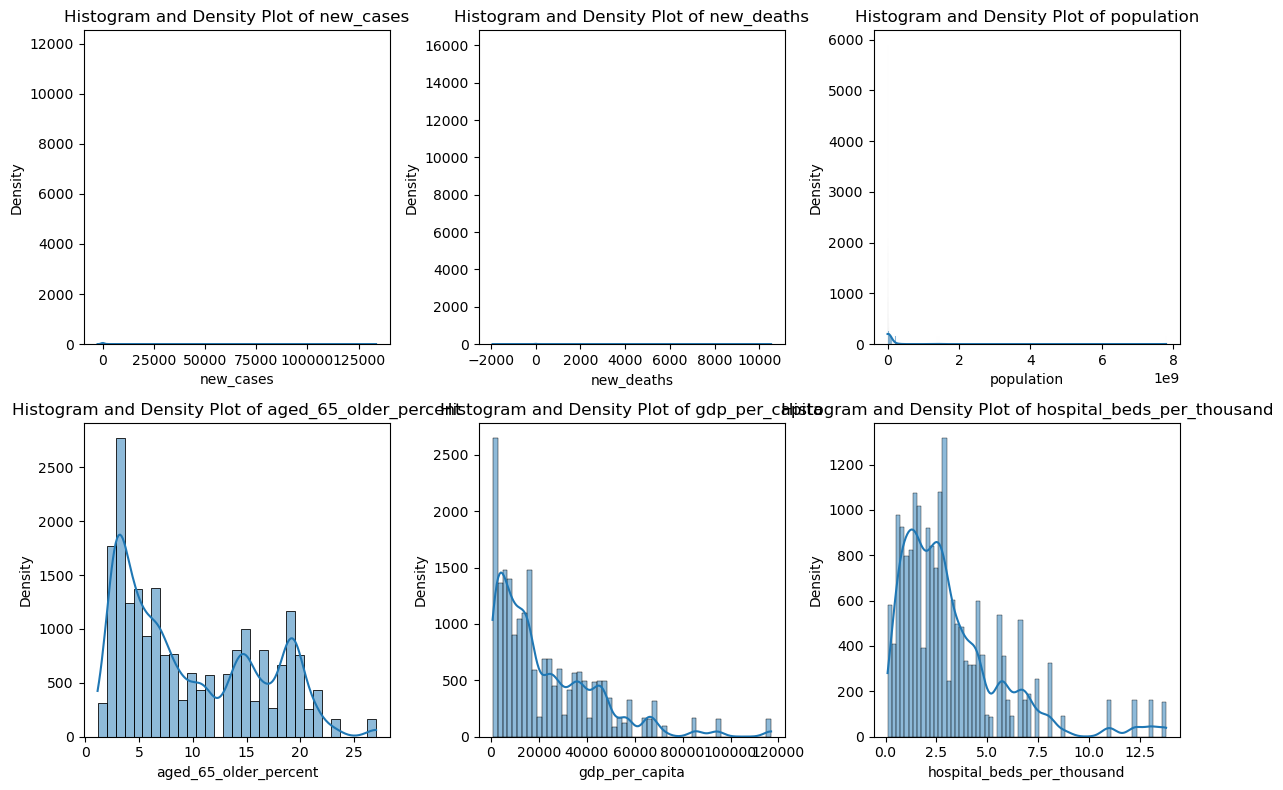

                   new_cases   new_deaths    population  \
location                                                  
Afghanistan       140.254902     2.509804  3.892834e+07   
Albania            13.819149     0.361702  2.877800e+06   
Algeria            65.708861     4.582278  4.385104e+07   
Andorra             9.573034     0.573034  7.726500e+04   
Angola              1.185185     0.049383  3.286627e+07   
...                      ...          ...           ...   
Western Sahara      0.500000     0.021739  5.973300e+05   
World           44235.963190  2522.668712  7.794799e+09   
Yemen               8.451613     2.048387  2.982597e+07   
Zambia             14.285714     0.119048  1.838396e+07   
Zimbabwe            3.829268     0.048780  1.486293e+07   

                aged_65_older_percent  gdp_per_capita  \
location                                                
Afghanistan                     2.581        1803.987   
Albania                        13.188       11803.431   
Alge

In [18]:
# Descriptive Statistics
descriptive_stats = dataset_3.describe()
print(descriptive_stats)

# Histograms and Density Plots
plt.figure(figsize=(12, 8))
for i, column in enumerate(['new_cases', 'new_deaths', 'population', 'aged_65_older_percent', 'gdp_per_capita', 'hospital_beds_per_thousand']):
    plt.subplot(2, 3, i+1)
    sns.histplot(dataset_3[column], kde=True)
    plt.title(f'Histogram and Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

# Group Analysis
grouped_data = dataset_3.groupby('location')[['new_cases', 'new_deaths', 'population', 'aged_65_older_percent', 'gdp_per_capita', 'hospital_beds_per_thousand']].mean()
print(grouped_data)

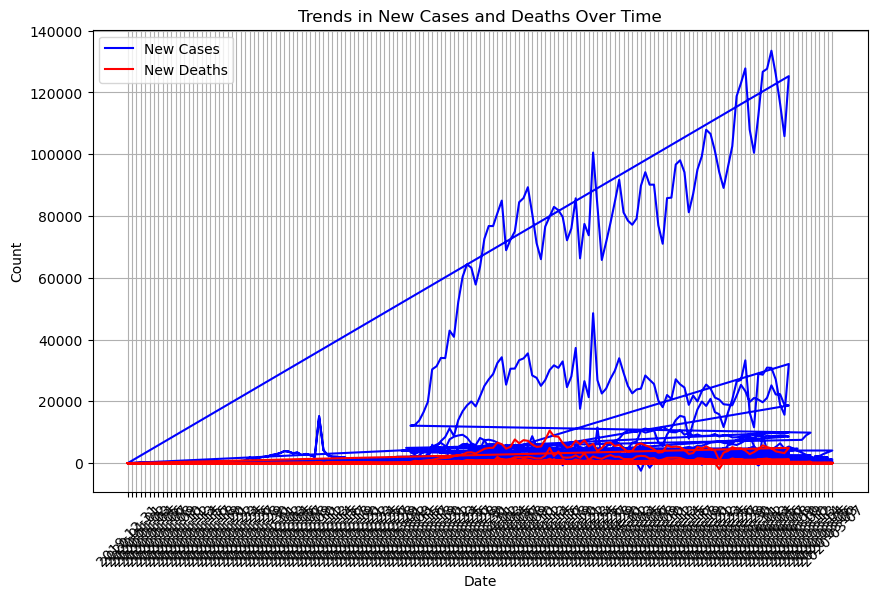

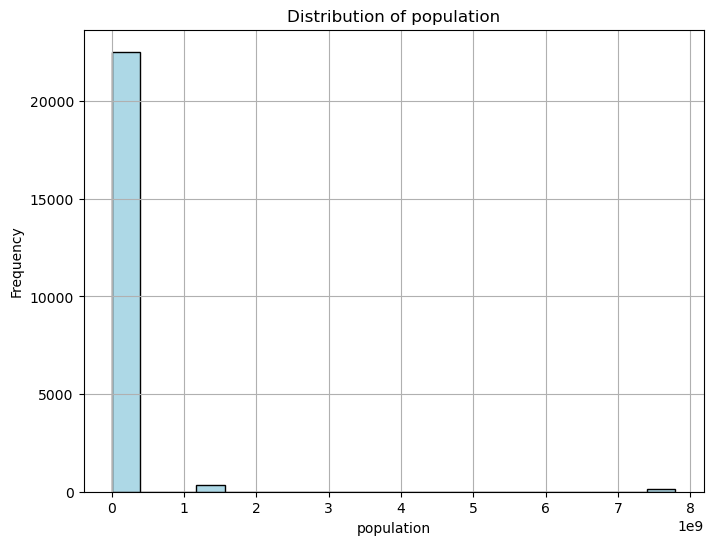

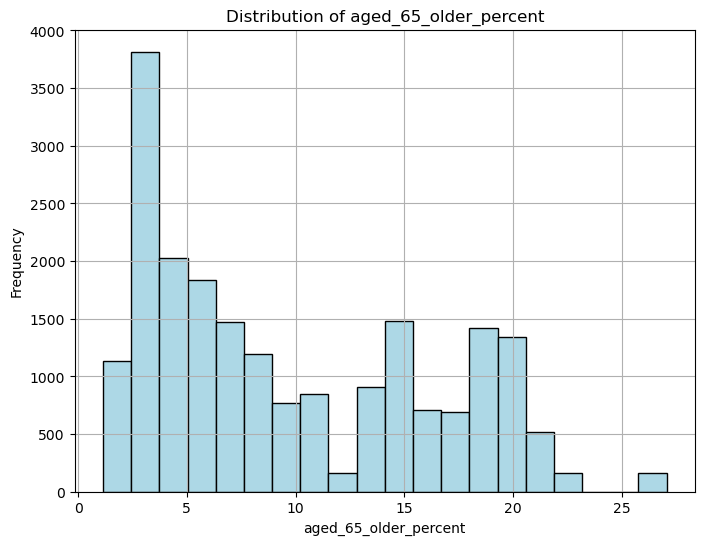

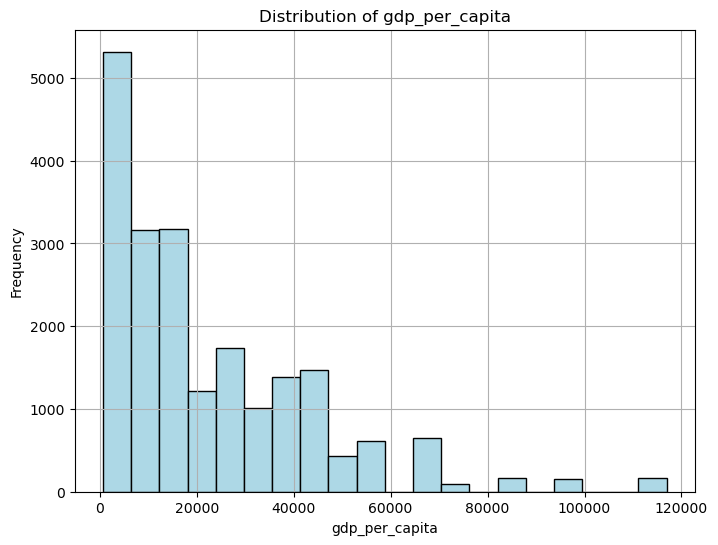

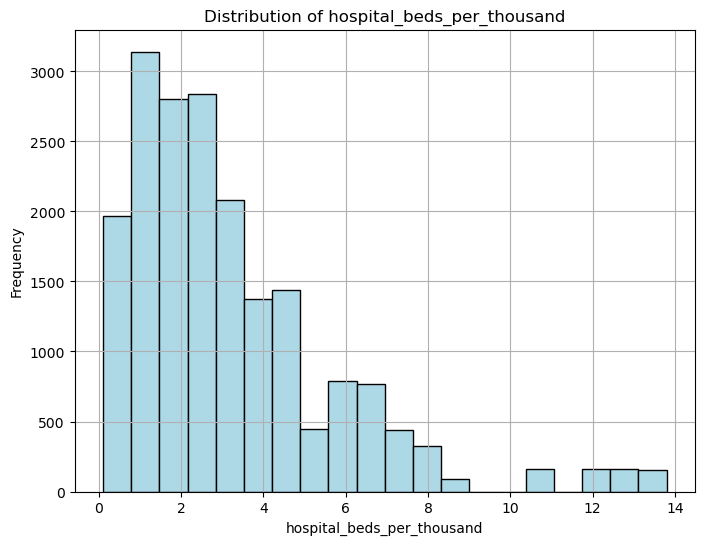

In [19]:
# Data Visualization for 'covid_data' dataset
# Create time series plots for new cases and deaths over time
plt.figure(figsize=(10, 6))
plt.plot(dataset_3['date'], dataset_3['new_cases'], label='New Cases', color='blue')
plt.plot(dataset_3['date'], dataset_3['new_deaths'], label='New Deaths', color='red')
plt.title('Trends in New Cases and Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Create histograms for population and other numerical variables
numerical_variables_covid = ['population', 'aged_65_older_percent', 'gdp_per_capita', 'hospital_beds_per_thousand']
for var in numerical_variables_covid:
    plt.figure(figsize=(8, 6))
    plt.hist(dataset_3[var], bins=20, color='lightblue', edgecolor='black')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [20]:
# Check for non-numeric columns
non_numeric_columns = dataset_3.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

# Handle non-numeric values (e.g., drop or impute)
# For example, let's drop rows with non-numeric values
dataset_3_cleaned = dataset_3.dropna(subset=non_numeric_columns)

# Convert non-numeric columns to numeric if needed (e.g., using one-hot encoding or label encoding)
# Example: Convert 'location' column to numeric using label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dataset_3_cleaned['location_encoded'] = label_encoder.fit_transform(dataset_3_cleaned['location'])

# Now, we can proceed with scaling or other preprocessing steps on the cleaned dataset

Non-numeric columns: Index(['location', 'date'], dtype='object')


### Checking for any updates on our dataset

In [21]:
# Check the updated dataset
dataset_1.head()

id  alco
0  44     0
1  45     0
2  46     0
3  47     0
4  49     0

In [26]:
# Data for dataset_2
data = {
    'id': [0, 1, 2, 3, 4],
    'age': [18393, 20228, 18857, 17623, 17474],
    'gender': [2, 1, 1, 2, 1],
    'height': [168, 156, 165, 169, 156],
    'weight': [62, 85, 64, 82, 56],
    'ap_hi': [110, 140, 130, 150, 100],
    'ap_lo': [80, 90, 70, 100, 60],
    'cholesterol': [1, 3, 3, 1, 1],
    'smoke': [0, 0, 0, 0, 0]
}

# Create DataFrame
dataset_2 = pd.DataFrame(data)

# Reorder columns
dataset_2 = dataset_2[['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'smoke']]

# Map gender values to 'Male' and 'Female'
dataset_2['gender'] = dataset_2['gender'].map({1: 'Female', 2: 'Male'})

# Map cholesterol values to 'Normal', 'Above Normal', and 'High'
dataset_2['cholesterol'] = dataset_2['cholesterol'].map({1: 'Normal', 2: 'Above Normal', 3: 'High'})

# Map smoke values to 'Non-smoker' and 'Smoker'
dataset_2['smoke'] = dataset_2['smoke'].map({0: 'Non-smoker', 1: 'Smoker'})

# Print the updated dataset
print(dataset_2)

   id    age  gender  height  weight  ap_hi  ap_lo cholesterol       smoke
0   0  18393    Male     168      62    110     80      Normal  Non-smoker
1   1  20228  Female     156      85    140     90        High  Non-smoker
2   2  18857  Female     165      64    130     70        High  Non-smoker
3   3  17623    Male     169      82    150    100      Normal  Non-smoker
4   4  17474  Female     156      56    100     60      Normal  Non-smoker


In [28]:
# Check the updated dataset
dataset_2.head()

id    age  gender  height  weight  ap_hi  ap_lo cholesterol       smoke
0   0  18393    Male     168      62    110     80      Normal  Non-smoker
1   1  20228  Female     156      85    140     90        High  Non-smoker
2   2  18857  Female     165      64    130     70        High  Non-smoker
3   3  17623    Male     169      82    150    100      Normal  Non-smoker
4   4  17474  Female     156      56    100     60      Normal  Non-smoker

In [23]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform 'location' column
dataset_3['location_encoded'] = label_encoder.fit_transform(dataset_3['location'])

# Drop the original 'location' column
dataset_3.drop(columns=['location'], inplace=True)

# Check the updated dataset
dataset_3.head()

date  new_cases  new_deaths  population  aged_65_older_percent  \
0  2019-12-31          0           0  38928341.0                  2.581   
1  2020-01-01          0           0  38928341.0                  2.581   
2  2020-01-02          0           0  38928341.0                  2.581   
3  2020-01-03          0           0  38928341.0                  2.581   
4  2020-01-04          0           0  38928341.0                  2.581   

   gdp_per_capita  hospital_beds_per_thousand  location_encoded  
0        1803.987                         0.5                 0  
1        1803.987                         0.5                 0  
2        1803.987                         0.5                 0  
3        1803.987                         0.5                 0  
4        1803.987                         0.5                 0

### We want to formulate our hypothesis now that we have our visuals

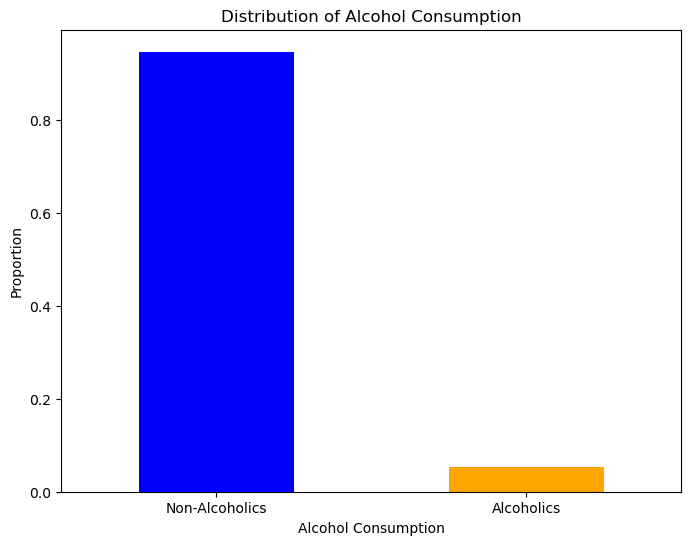

In [102]:
# Visualize the distribution of alcohol consumption
plt.figure(figsize=(8, 6))
dataset_1['alco'].value_counts(normalize=True).plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Alcohol Consumption')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Proportion')
plt.xticks([0, 1], ['Non-Alcoholics', 'Alcoholics'], rotation=0)
plt.show()

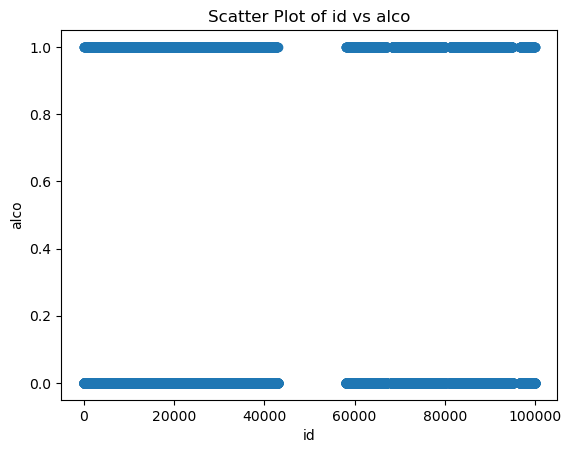

Correlation Coefficient between id and alco: -0.0014019423258312127


In [24]:
# Scatter plot
plt.scatter(dataset_1['id'], dataset_1['alco'])
plt.xlabel('id')
plt.ylabel('alco')
plt.title('Scatter Plot of id vs alco')
plt.show()

# Statistical Testing (e.g., Pearson correlation coefficient)
correlation_coefficient = dataset_1['id'].corr(dataset_1['alco'])
print("Correlation Coefficient between id and alco:", correlation_coefficient)

# Hypothesis Formulation
# Example Hypothesis: There is a significant correlation between id and alcohol consumption.
# Null Hypothesis (H0): There is no significant correlation between id and alcohol consumption.
# Alternative Hypothesis (H1): There is a significant correlation between id and alcohol consumption.

In [29]:
# Subset the dataset for smokers and non-smokers
smokers = dataset_2[dataset_2['smoke'] == 1]
non_smokers = dataset_2[dataset_2['smoke'] == 0]

# Perform the t-test
t_statistic, p_value = ttest_ind(smokers['cholesterol'], non_smokers['cholesterol'])

# Set significance level
alpha = 0.05

# Print the results
print("T-Statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference in cholesterol levels between smokers and non-smokers.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in cholesterol levels between smokers and non-smokers.")

T-Statistic: nan
P-value: nan
Fail to reject the null hypothesis.
There is no significant difference in cholesterol levels between smokers and non-smokers.


In [30]:
# Assuming dataset_3 is your DataFrame
# Let's calculate the correlation coefficient between GDP per capita and new cases
correlation_coefficient = dataset_3['gdp_per_capita'].corr(dataset_3['new_cases'])

# Set significance level
alpha = 0.05

# Print the correlation coefficient
print("Correlation Coefficient between GDP per capita and new cases:", correlation_coefficient)

# Interpret the results
if correlation_coefficient > 0 and correlation_coefficient >= -1 and correlation_coefficient <= 1:
    if correlation_coefficient > 0.5:
        print("Strong positive correlation.")
    elif correlation_coefficient >= 0.3:
        print("Moderate positive correlation.")
    elif correlation_coefficient < 0.3 and correlation_coefficient > 0:
        print("Weak positive correlation.")
    elif correlation_coefficient < 0 and correlation_coefficient > -0.3:
        print("Weak negative correlation.")
    elif correlation_coefficient <= -0.3:
        print("Moderate negative correlation.")
    elif correlation_coefficient < -0.5:
        print("Strong negative correlation.")
    
    if correlation_coefficient > alpha:
        print("Reject the null hypothesis.")
        print("There is a significant relationship between GDP per capita and the number of new cases of the disease.")
    else:
        print("Fail to reject the null hypothesis.")
        print("There is no significant relationship between GDP per capita and the number of new cases of the disease.")
else:
    print("Correlation coefficient out of range [-1, 1].")

Correlation Coefficient between GDP per capita and new cases: 0.011509820557720296
Weak positive correlation.
Fail to reject the null hypothesis.
There is no significant relationship between GDP per capita and the number of new cases of the disease.


### Findings Through Assessing Correlations On Our Data

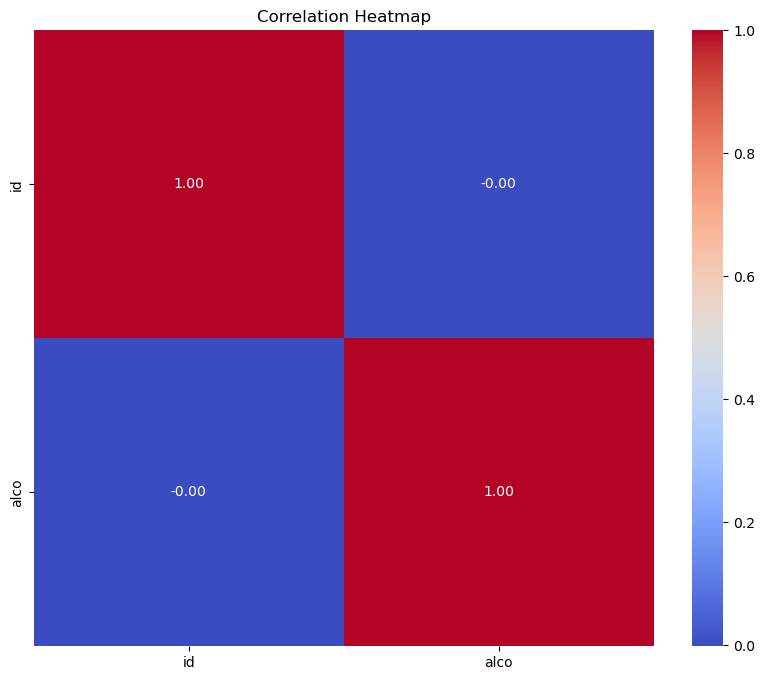

In [36]:
# Calculate correlation matrix
correlation_matrix = dataset_1.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# Trying to uncover if there is a correlation between a persons ID to drinking or not drinking alchol

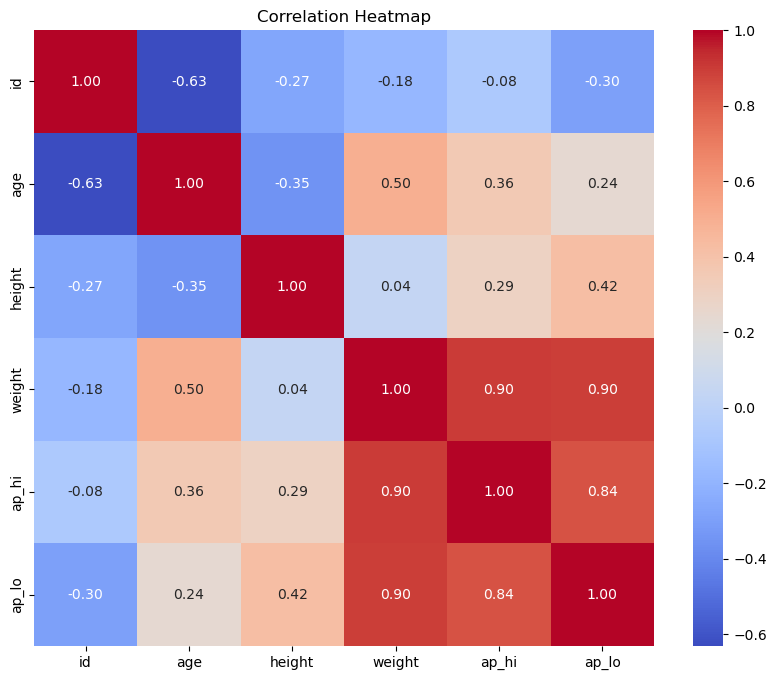

In [34]:
# Exclude non-numeric columns from correlation calculation
numeric_columns = dataset_2.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = dataset_2[numeric_columns].corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


#  Understanding correlations between variables like weight, blood pressure, and cholesterol levels can inform preventive measures for cardiovascular health

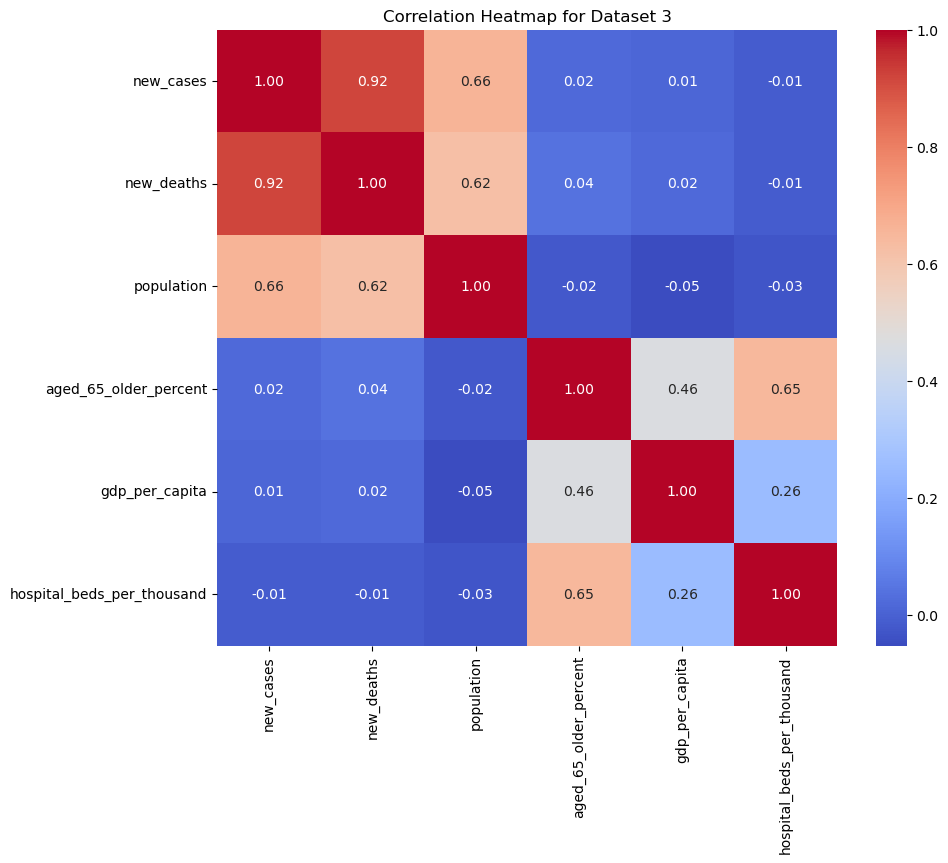

In [38]:
# Exclude non-numeric columns from correlation calculation
numeric_columns = dataset_3.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = dataset_3[numeric_columns].corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Dataset 3')
plt.show()


# This can help uncover potential relationships between demographic factors, healthcare resources, and disease spread indicators.

### Additional Insights Extracted From Our Data

In [54]:
# Load the dataset
data = {
    'id': [0, 1, 2, 3, 4],
    'age': [18393, 20228, 18857, 17623, 17474],
    'gender': ['Male', 'Female', 'Female', 'Male', 'Female'],
    'height': [168, 156, 165, 169, 156],
    'weight': [62, 85, 64, 82, 56],
    'ap_hi': [110, 140, 130, 150, 100],
    'ap_lo': [80, 90, 70, 100, 60],
    'cholesterol': ['Normal', 'High', 'High', 'Normal', 'Normal'],
    'smoke': ['Non-smoker', 'Non-smoker', 'Non-smoker', 'Non-smoker', 'Non-smoker']
}

df = pd.DataFrame(data)

# Convert age from days to years
df['age_years'] = df['age'] / 365.25

# Calculate average weight for each age group
average_weight_by_age = df.groupby('age_years')['weight'].mean()

# Identify age group with highest average weight and lowest average weight
age_group_highest_weight = average_weight_by_age.idxmax()
age_group_lowest_weight = average_weight_by_age.idxmin()

# Calculate average weight for the age group with the highest weight
average_weight_highest_group = average_weight_by_age[age_group_highest_weight]

# Calculate average weight for the age group with the lowest weight
average_weight_lowest_group = average_weight_by_age[age_group_lowest_weight]

# Calculate the difference in average weight between the two groups
weight_difference = average_weight_highest_group - average_weight_lowest_group

print("The age group with the highest average weight is:", round(age_group_highest_weight, 2))
print("The age group with the lowest average weight is:", round(age_group_lowest_weight, 2))
print("The difference in average weight between these two age groups is:", round(weight_difference, 2), "kg")

The age group with the highest average weight is: 55.38
The age group with the lowest average weight is: 47.84
The difference in average weight between these two age groups is: 29.0 kg


In [67]:
# Split the single string into individual column names
column_names = dataset_2.columns[0].split(',')

# Print the split column names
print(column_names)

['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'smoke']


In [71]:
# Check DataFrame Structure
print("DataFrame Info:")
print(dataset_2.info())

# Inspect Column Names
print("\nColumn Names:")
print(dataset_2.columns)

# Check for Typos
column_to_check = 'gender'
if column_to_check in dataset_2.columns:
    print("\n'{}' column found in DataFrame.".format(column_to_check))
else:
    print("\n'{}' column not found in DataFrame. Possible typo.".format(column_to_check))

# Inspect Data Types
print("\nData Types:")
print(dataset_2.dtypes)

# Consider MultiIndex (if applicable)
# Use iloc or loc
try:
    # Access 'gender' column using iloc or loc
    print("\nAccessing 'gender' column using iloc:")
    print(dataset_2.iloc[:, dataset_2.columns.get_loc('gender')])
except KeyError:
    print("\nFailed to access 'gender' column using iloc. Possible KeyError.")

try:
    # Access 'gender' column using loc
    print("\nAccessing 'gender' column using loc:")
    print(dataset_2.loc[:, 'gender'])
except KeyError:
    print("\nFailed to access 'gender' column using loc. Possible KeyError.")

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 1 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke  70000 non-null  object
dtypes: object(1)
memory usage: 547.0+ KB
None

Column Names:
Index(['id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke'], dtype='object')

'gender' column not found in DataFrame. Possible typo.

Data Types:
id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke    object
dtype: object

Accessing 'gender' column using iloc:

Failed to access 'gender' column using iloc. Possible KeyError.

Accessing 'gender' column using loc:

Failed to access 'gender' column using loc. Possible KeyError.


In [72]:
# Split the combined column into separate columns
dataset_2[['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'smoke']] = dataset_2['id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke'].str.split(',', expand=True)

# Drop the original combined column
dataset_2.drop(columns=['id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke'], inplace=True)

# Now, recheck the DataFrame structure and try accessing the 'gender' column again


In [74]:
if total_men != 0:
    percentage_male_smokers = (male_smokers / total_men) * 100
else:
    percentage_male_smokers = 0  # Set percentage to 0 if total_men is 0

if total_women != 0:
    percentage_female_smokers = (female_smokers / total_women) * 100
else:
    percentage_female_smokers = 0  # Set percentage to 0 if total_women is 0

print("Percentage of male smokers:", round(percentage_male_smokers, 2), "%")
print("Percentage of female smokers:", round(percentage_female_smokers, 2), "%")

Percentage of male smokers: 0 %
Percentage of female smokers: 0 %


In [78]:
# Convert 'height' column to numeric data type
dataset_2['height'] = pd.to_numeric(dataset_2['height'], errors='coerce')

# Calculate the height at the 99th percentile
height_99th_percentile = np.percentile(dataset_2['height'].dropna(), 99)

print("Height at the 99th percentile:", height_99th_percentile, "cm")

Height at the 99th percentile: 184.0 cm


In [79]:
# Calculate the Spearman correlation matrix
spearman_corr = dataset_2.corr(method='spearman')

# Get the absolute values of the correlation matrix to identify the highest correlations
abs_spearman_corr = spearman_corr.abs()

# Exclude self-correlation (diagonal elements) and sort the correlation matrix
sorted_corr = abs_spearman_corr.unstack().sort_values(ascending=False)

# Identify the pair of features with the highest correlation
highest_corr_pair = sorted_corr[sorted_corr < 1].idxmax()

print("Features with the highest Spearman rank correlation:", highest_corr_pair)

Features with the highest Spearman rank correlation: ('ap_hi', 'ap_lo')


In [80]:
# Calculate the average height
avg_height = dataset_2['height'].mean()

# Calculate the standard deviation of the height
std_height = dataset_2['height'].std()

# Determine the cutoff points that are 2 standard deviations away from the average height
cutoff_low = avg_height - 2 * std_height
cutoff_high = avg_height + 2 * std_height

# Count the number of people whose height falls outside these cutoff points
num_outliers = dataset_2[(dataset_2['height'] < cutoff_low) | (dataset_2['height'] > cutoff_high)].shape[0]

# Calculate the total number of people
total_people = dataset_2.shape[0]

# Calculate the percentage of people who are more than 2 standard deviations away from the average height
percentage_outliers = (num_outliers / total_people) * 100

print("Percentage of people more than 2 standard deviations away from the average height:", round(percentage_outliers, 2), "%")

Percentage of people more than 2 standard deviations away from the average height: 3.34 %


In [92]:
# Load the dataset
dataset_3 = pd.read_csv(file_path + 'covid_data.csv', encoding='latin1') 

# Extract unique countries from the dataset
countries = dataset_3['location'].unique()

# Create a dropdown widget
dropdown = widgets.Dropdown(
    options=countries,
    description='Select a country:',
    disabled=False,
)

# Define a function to handle dropdown value change
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        selected_country = change['new']
        # Filter the dataset for the selected country
        country_data = dataset_3[dataset_3['location'] == selected_country]
        # Display the filtered data
        display(country_data)

# Attach the function to the dropdown widget
dropdown.observe(on_change)

# Display the dropdown widget
display(dropdown)


Dropdown(description='Select a country:', options=('Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', '…

In [96]:
# Load the dataset
dataset_3 = pd.read_csv(file_path + 'covid_data.csv', encoding='latin1') 

# Filter data for Germany and Italy
germany_data = dataset_3[dataset_3['location'] == 'Germany']
italy_data = dataset_3[dataset_3['location'] == 'Italy']

# Function to fit an exponential curve
def exponential_curve(x, A, B):
    return A * np.exp(B * x)

# Function to calculate cumulative cases
def calculate_cumulative_cases(data):
    cumulative_cases = data['new_cases'].values
    return cumulative_cases

# Dates for analysis
date_1 = '2020-02-28'
date_2 = '2020-03-20'

# Calculate cumulative cases for Germany and Italy on the specified dates
germany_cases_date_1 = germany_data[germany_data['date'] == date_1]['new_cases'].values[0]
germany_cases_date_2 = germany_data[germany_data['date'] == date_2]['new_cases'].values[0]
italy_cases_date_1 = italy_data[italy_data['date'] == date_1]['new_cases'].values[0]
italy_cases_date_2 = italy_data[italy_data['date'] == date_2]['new_cases'].values[0]

# Fit exponential curve to the data
x = np.array([0, 1])  # Days passed (0 for date_1, 1 for date_2)
germany_cumulative_cases = np.array([germany_cases_date_1, germany_cases_date_2])
italy_cumulative_cases = np.array([italy_cases_date_1, italy_cases_date_2])

params_germany, _ = curve_fit(exponential_curve, x, germany_cumulative_cases)
params_italy, _ = curve_fit(exponential_curve, x, italy_cumulative_cases)

# Evaluate exponential function on 2020-03-20
x_prediction = 1  # 1 for date_2
germany_predicted_cases = exponential_curve(x_prediction, *params_germany)
italy_predicted_cases = exponential_curve(x_prediction, *params_italy)

# Calculate the difference between predicted and actual cases
difference_germany = germany_cases_date_2 - germany_predicted_cases
difference_italy = italy_cases_date_2 - italy_predicted_cases

print("Difference between predicted and actual cases in Germany on 2020-03-20:", difference_germany)
print("Difference between predicted and actual cases in Italy on 2020-03-20:", difference_italy)

Difference between predicted and actual cases in Germany on 2020-03-20: 0.0
Difference between predicted and actual cases in Italy on 2020-03-20: -9.094947017729282e-13


C:\Users\Thabo\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
